<a href="https://colab.research.google.com/github/Suki122/Hijerarhijsko_klasteriranje_drzave_svijeta/blob/main/Hijerarhijsko_klasteriranje_dr%C5%BEave_svijeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uvod
Ovaj projekt fokusira se na hijerarhijsko klasteriranje država svijeta prema njihovim socio-ekonomskim pokazateljima. U suvremenom svijetu, države se često dijele prema strogo geografskim granicama (regijama), no takva podjela često zanemaruje stvarne sličnosti u kvaliteti života, ekonomskoj snazi i društvenom razvoju.Svrha ovog rada je primijeniti metode strojnog učenja kako bi se:

* Identificirale skupine država koje dijele slične razvojne karakteristike, neovisno o njihovoj lokaciji na karti.

* Analiziralo kako različiti parametri, poput BDP-a po stanovniku, očekivanog životnog vijeka i ulaganja u obrazovanje, utječu na formiranje tih skupina.


* Istražilo jesu li geografski susjedi ujedno i socio-ekonomski slični ili postoje značajna odstupanja.


# **Podaci**
Podaci koje koristimo pronađeni su na linku: https://www.kaggle.com/datasets/nishanthsalian/socioeconomic-country-profiles?resource=download
Podaci sadrže 66 država svijeta i 96 različitih pokazatelja, što omogućuje vrlo detaljnu analizu. Kako dendrogram ne bi postao previše kompliciran za analizu, odabrali smo 7 najvažnijih pokazatelja (stupaca) koji pokrivaju ključne socio-ekonomske aspekte.

Odabrani stupci:
* GDP per capita (current US$) – Glavno mjerilo ekonomskog standarda.

* Life expectancy at birth, total (years) – Pokazatelj općeg zdravlja i kvalitete života.

* Unemployment (% of labour force) – Stabilnost tržišta rada.

* Education: Government expenditure (% of GDP) – Ulaganje države u razvoj i znanje.

* Infant mortality rate (per 1000 live births) – Osjetljiv pokazatelj kvalitete zdravstvenog sustava.

* Fertility rate, total (live births per woman) – Demografska slika i budući trendovi.

* GDP growth rate (annual %) – Dinamika gospodarskog razvoja.




# Čišćenje i standardizacija podataka
**Čišćenje**: Uklonili smo -99 i simbole poput ~ jer bi ih algoritam inače tretirao kao pogrešne vrijednosti ili tekst, što bi srušilo program.

**Standardizacija**: Budući da klasteriranje koristi udaljenost između točaka, stupac s velikim brojevima (poput BDP-a od 50.000) bi potpuno "pobijedio" stupac s malim brojevima (poput stope plodnosti od 1.5). Normalizacijom smo sve varijable sveli na istu skalu (gdje je prosjek 0, a standardna devijacija 1), tako da svaka ima jednaku važnost.

Podaci se nalaze na Google Driveu, stoga potrebno je povezati Colab s Driveom.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# 1. Učitavanje originalnog filea
df = pd.read_csv('/content/drive/MyDrive/Projekt-UUI/soci_econ_country_profiles.csv')

# 2. Definiranje 7 ključnih stupaca
selected_columns = [
    'GDP per capita (current US$)',
    'Life expectancy at birth, total (years)',
    'Unemployment (% of labour force)',
    'Education: Government expenditure (% of GDP)',
    'Infant mortality rate (per 1000 live births',
    'Fertility rate, total (live births per woman)',
    'GDP growth rate (annual %, const. 2005 prices)'
]

# 3. Ekstrakcija i čišćenje podataka (zadržavamo originalne mjerne jedinice)
# Uzimamo državu i 7 stupaca
tablica_drzava = df[['country'] + selected_columns].copy()

for col in selected_columns:
    # Čišćenje simbola i pretvaranje u brojeve
    tablica_drzava[col] = pd.to_numeric(tablica_drzava[col].astype(str).str.replace('~', ''), errors='coerce')
    # Zamjena placeholder vrijednosti -99 sa NaN radi preglednosti
    tablica_drzava[col] = tablica_drzava[col].replace(-99, np.nan)

# 4. Prikaz cijele tablice (66 država)
# U Colabu, naredba 'display' omogućuje interaktivni pregled tablice
display(tablica_drzava)

# Opcionalno: Spremanje ove čiste tablice u novi CSV za seminar
tablica_drzava.to_csv('pregled_drzava_7_stupaca.csv', index=False)

print(f"Tablica sa {len(tablica_drzava)} država je spremna za pregled.")

,country,GDP per capita (current US$),"Life expectancy at birth, total (years)",Unemployment (% of labour force),Education: Government expenditure (% of GDP),Infant mortality rate (per 1000 live births,"Fertility rate, total (live births per woman)","GDP growth rate (annual %, const. 2005 prices)"
0,Argentina,14564.5,76.372000,6.5,5.3,13.7,2.3,2.4
1,Australia,51352.2,82.500000,5.5,5.2,3.9,1.9,2.4
2,Austria,44117.7,81.643902,6.2,5.5,3.3,1.4,1.0
3,Belarus,5750.8,74.129268,0.5,4.9,3.6,1.6,-3.9
4,Belgium,40277.8,81.492683,8.3,6.6,3.5,1.8,1.5
...,...,...,...,...,...,...,...,...
61,United Arab Emirates,40438.8,77.647000,3.7,NaN,6.2,1.8,3.8
62,United Kingdom,44162.4,81.256098,5.0,5.7,4.1,1.9,2.2
63,United States of America,56053.8,78.539024,4.9,5.4,6.0,1.9,2.6
64,Venezuela (Bolivarian Republic of),11068.9,72.246000,6.6,NaN,13.8,2.4,-6.2


Tablica sa 66 država je spremna za pregled.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Učitavanje već očišćene tablice (iz prethodnog koraka)
# Ovaj file sadrži originalne mjerne jedinice, ali bez simbola ~ i -99
file_name = 'pregled_drzava_7_stupaca.csv'
df_cleaned = pd.read_csv(file_name)

# 2. Definiranje stupaca za skaliranje (svi osim 'country')
# Koristimo list comprehension da automatski uzmemo sve numeričke stupce
features = [col for col in df_cleaned.columns if col != 'country']

# 3. Popunjavanje praznih mjesta (Imputacija)
# Budući da skaliranje ne trpi NaN vrijednosti, popunjavamo ih prosjekom
df_imputed = df_cleaned.copy()
df_imputed[features] = df_imputed[features].fillna(df_imputed[features].mean())

# 4. Skaliranje (Standardizacija)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed[features])

# 5. Kreiranje finalne tablice s rezultatima
df_scaled_results = pd.DataFrame(X_scaled, columns=features)
df_scaled_results.insert(0, 'country', df_imputed['country'])

# Prikaz rezultata u Colabu
display(df_scaled_results)

# 6. Spremanje finalnog filea kojeg će koristiti dendrogram
df_scaled_results.to_csv('skalirani_podaci_final.csv', index=False)

print(f"Uspješno učitano iz '{file_name}' i spremljeno u 'skalirani_podaci_final.csv'.")
print(f"Obrađeno država: {len(df_scaled_results)}")


,country,GDP per capita (current US$),"Life expectancy at birth, total (years)",Unemployment (% of labour force),Education: Government expenditure (% of GDP),Infant mortality rate (per 1000 live births,"Fertility rate, total (live births per woman)","GDP growth rate (annual %, const. 2005 prices)"
0,Argentina,-0.439011,-0.354109,-0.258707,0.333988,0.399427,0.817181,-0.025421
1,Australia,1.362030,1.048143,-0.437126,0.248973,-0.510895,0.095657,-0.025421
2,Austria,1.007846,0.852245,-0.312233,0.504018,-0.566629,-0.806249,-0.370842
3,Belarus,-0.870509,-0.867306,-1.329219,-0.006073,-0.538762,-0.445487,-1.579818
4,Belgium,0.819853,0.817642,0.062447,1.439183,-0.548051,-0.084724,-0.247477
...,...,...,...,...,...,...,...,...
61,United Arab Emirates,0.827735,-0.062354,-0.758279,0.000000,-0.297248,-0.084724,0.320001
62,United Kingdom,1.010034,0.763505,-0.526335,0.674048,-0.492317,0.095657,-0.074767
63,United States of America,1.592209,0.141765,-0.544177,0.419003,-0.315826,0.095657,0.023925
64,Venezuela (Bolivarian Republic of),-0.610147,-1.298249,-0.240865,0.000000,0.408716,0.997562,-2.147296


Uspješno učitano iz 'pregled_drzava_7_stupaca.csv' i spremljeno u 'skalirani_podaci_final.csv'.
Obrađeno država: 66


# Razrada: Aglomerativno hijerarhijsko klasteriranje

 Logika algoritma (Bottom-Up)
U našem projektu, aglomerativni pristup funkcionira kroz proces "pripajanja":

Početak: Svaka od 66 država se tretira kao zaseban klaster (66 klastera).

Traženje sličnosti: Algoritam u prostoru naših 7 normaliziranih varijabli traži dvije države koje su "najbliže".

Spajanje: Te dvije države postaju jedna grupa. Proces se ponavlja dok na kraju sve države ne završe u jednoj velikoj skupini.

Sada ćemo prikazati dendrograme podataka s korištenim različitim metrikama udaljenosti i metodama spajanja.

# --- METODA: Ward | METRIKA: Euclidean ---
Zašto: Wardova metoda teži stvaranju klastera slične veličine minimiziranjem varijance unutar grupa. Euklidska udaljenost je najprirodniji prikaz "zračne" razlike između država u prostoru. Ova kombinacija najbolje odvaja bogate, siromašne i tranzicijske zemlje u jasne blokove.

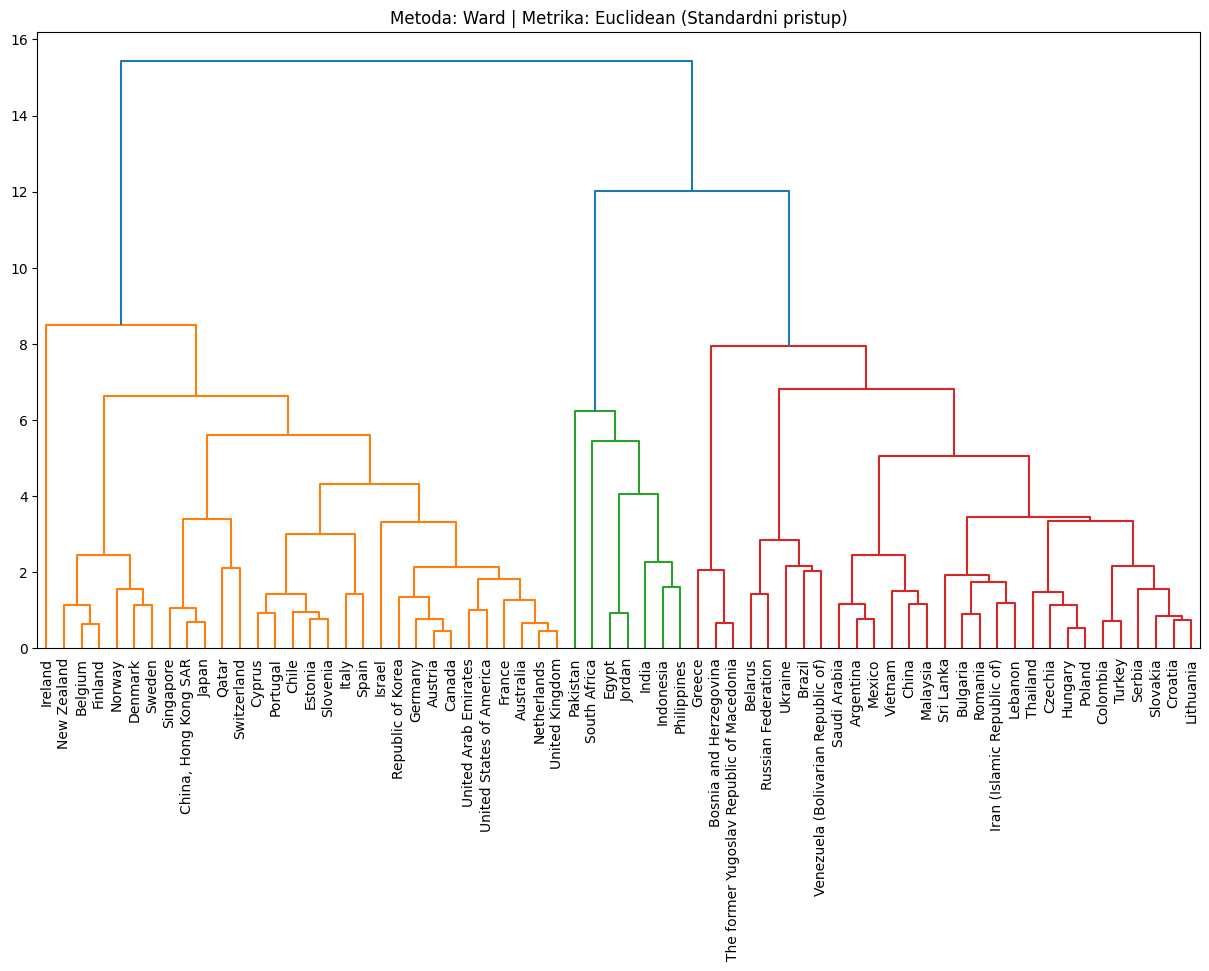

In [ ]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Učitavanje podataka
df = pd.read_csv('skalirani_podaci_final.csv')
X = df.drop(columns=['country']).values
labels = df['country'].values


Z_ward = sch.linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(15, 8))
sch.dendrogram(Z_ward, labels=labels, leaf_rotation=90, leaf_font_size=10)
plt.title('Metoda: Ward | Metrika: Euclidean (Standardni pristup)')
plt.show()

# --- METODA: Complete | METRIKA: Manhattan (cityblock) ---
Zašto: Complete Linkage spaja klastere na temelju njihova dva NAJUDALJENIJA člana, što rezultira vrlo kompaktnim grupama. Manhattan udaljenost (cityblock) mjeri razliku kao zbroj apsolutnih odmaka po svakoj varijabli. Manje je
osjetljiva na države koje su ekstremni "outlieri" u samo jednom stupcu (npr. samo BDP).

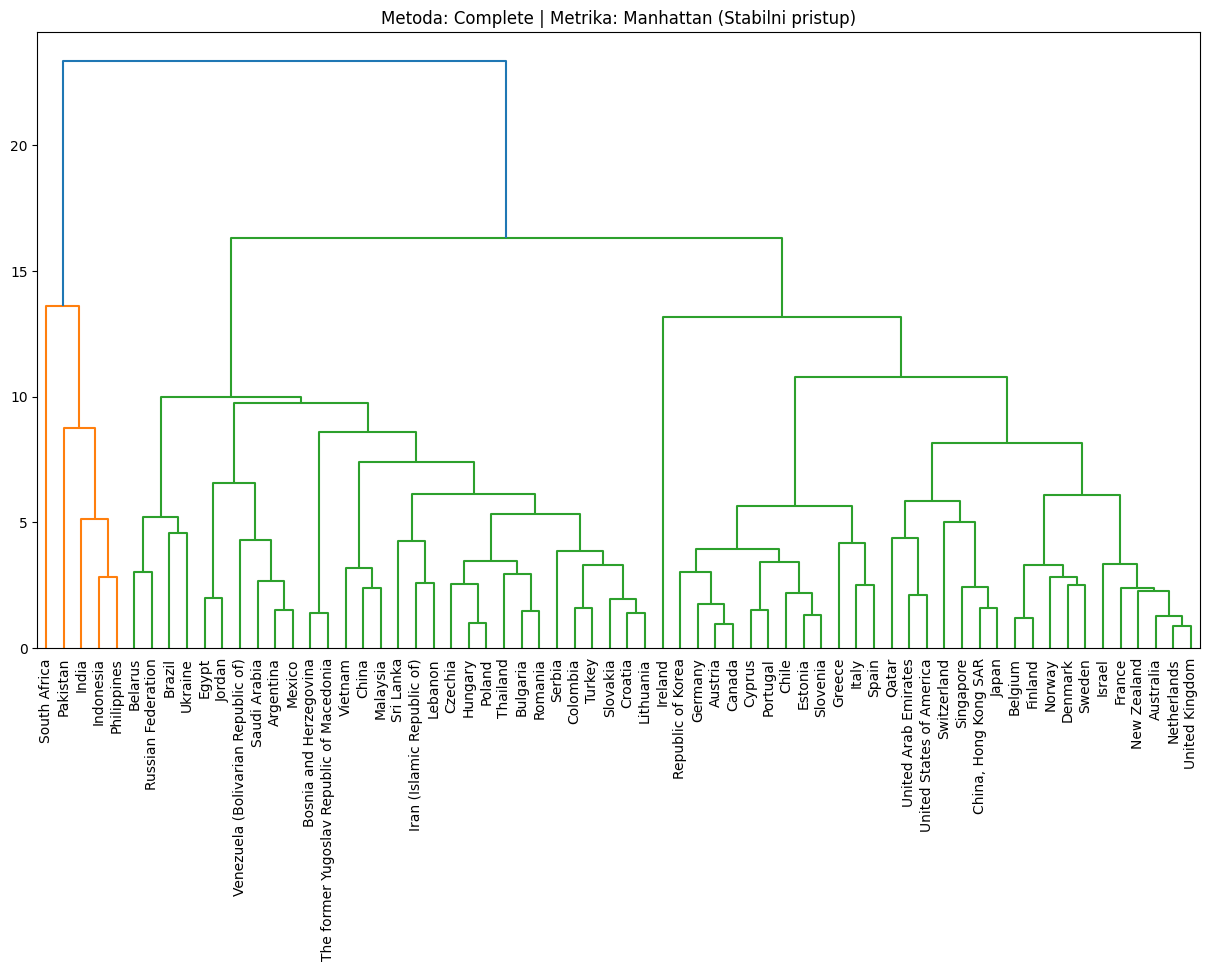

In [ ]:


Z_complete = sch.linkage(X, method='complete', metric='cityblock')

plt.figure(figsize=(15, 8))
sch.dendrogram(Z_complete, labels=labels, leaf_rotation=90, leaf_font_size=10)
plt.title('Metoda: Complete | Metrika: Manhattan (Stabilni pristup)')
plt.show()

# --- METODA: Average | METRIKA: Cosine ---
Zašto: Kosinusna udaljenost ne gleda apsolutne iznose (koliko je neka država bogata u dolarima), već gleda "kut" ili omjer između varijabli.
Primjerice, dvije države mogu ispasti slične jer obje troše isti postotak BDP-a na obrazovanje u odnosu na zdravstvo, iako je jedna država ukupno bogatija. Average Linkage koristi prosjek svih udaljenosti za spajanje.


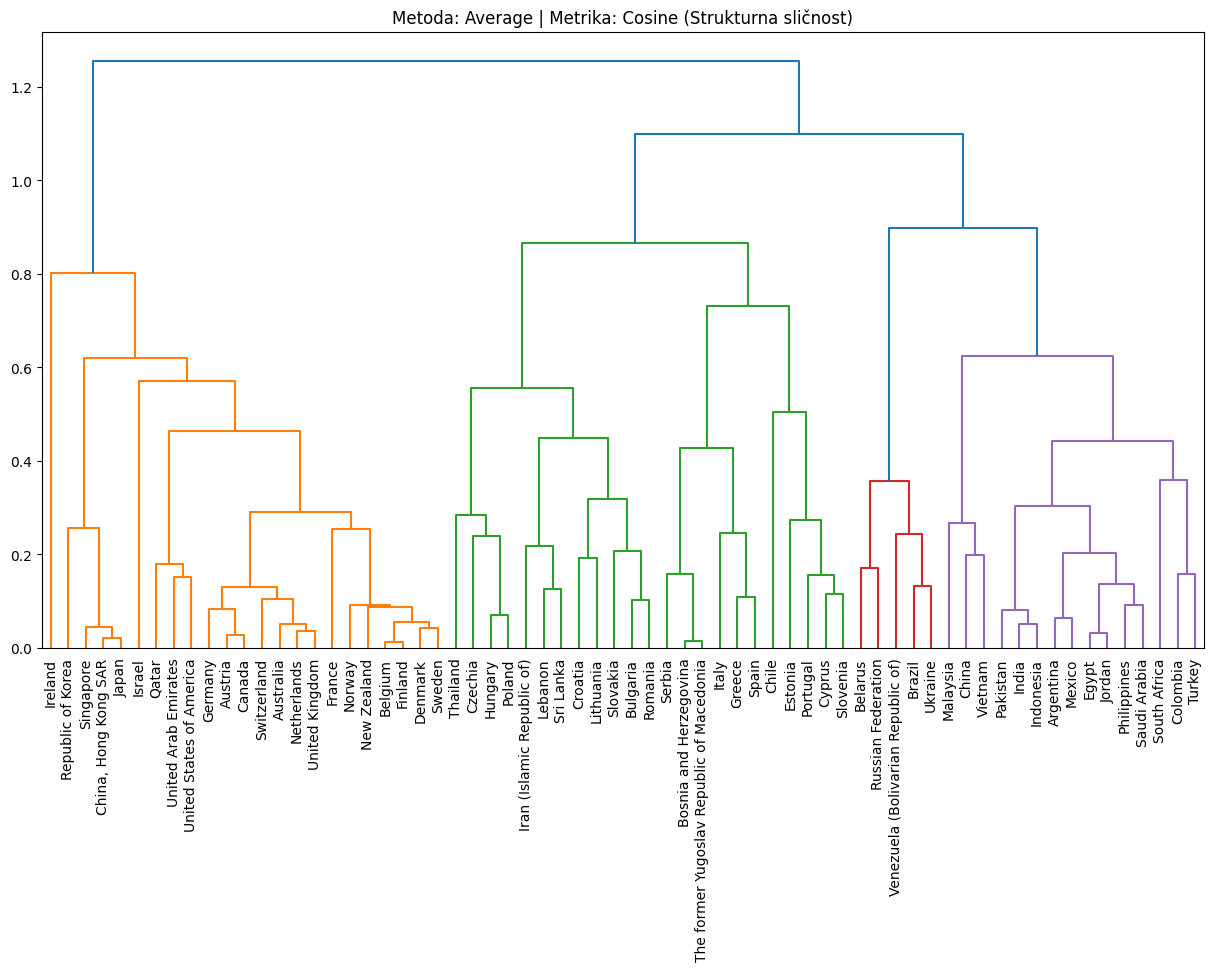

In [ ]:

Z_cosine = sch.linkage(X, method='average', metric='cosine')

plt.figure(figsize=(15, 8))
sch.dendrogram(Z_cosine, labels=labels, leaf_rotation=90, leaf_font_size=10)
plt.title('Metoda: Average | Metrika: Cosine (Strukturna sličnost)')
plt.show()

# --- METODA: Single | METRIKA: Euclidean ---
Zašto: Single Linkage spaja klastere na temelju dva NAJBLIŽA susjeda. U praksi to često dovodi do "chaining" efekta, gdje se države spajaju jedna na drugu u dugački niz umjesto u jasne grupe. Korisno je za prikaz u radu kako bismo objasnili zašto Wardova ili Complete metoda daju bolje rezultate.


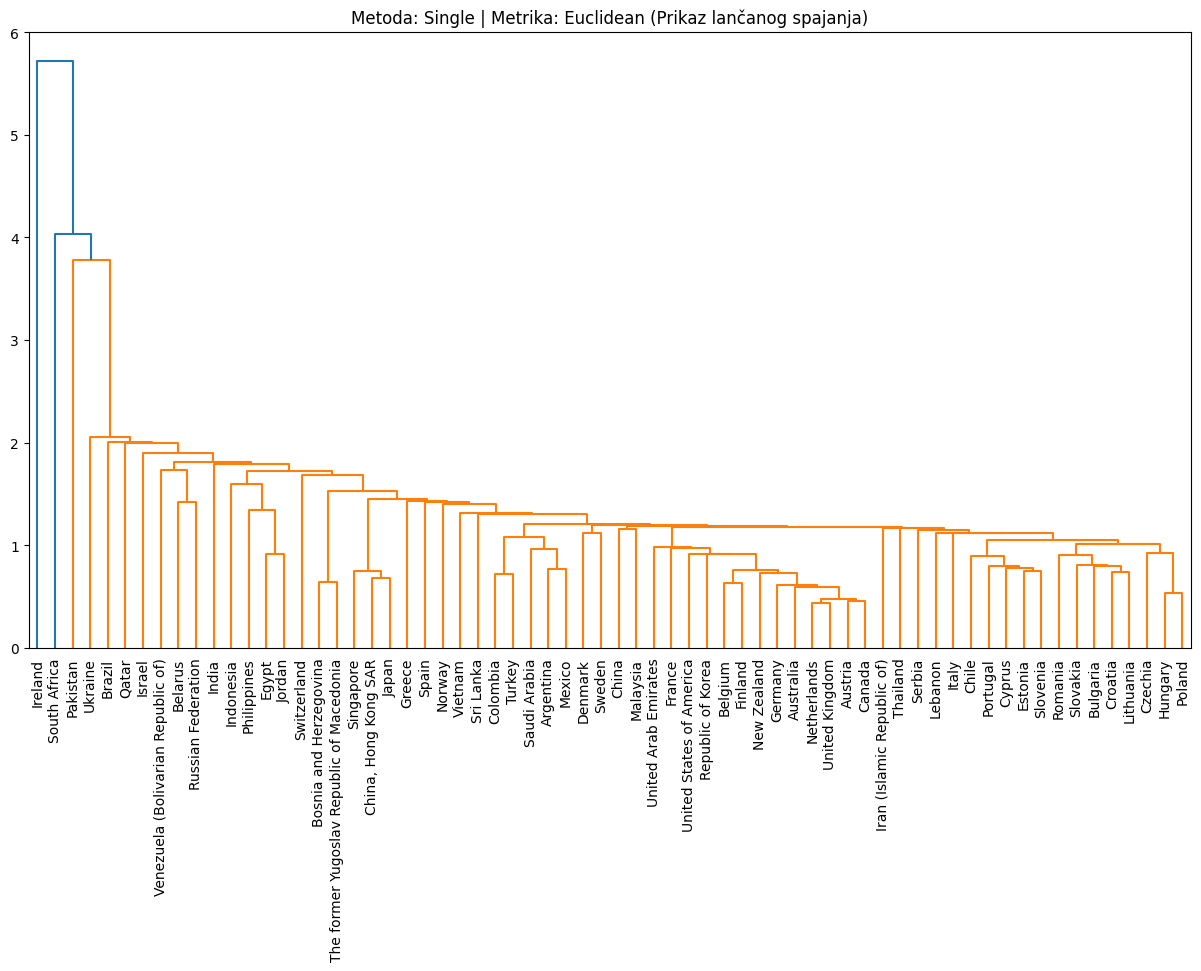

In [ ]:

Z_single = sch.linkage(X, method='single', metric='euclidean')

plt.figure(figsize=(15, 8))
sch.dendrogram(Z_single, labels=labels, leaf_rotation=90, leaf_font_size=10)
plt.title('Metoda: Single | Metrika: Euclidean (Prikaz lančanog spajanja)')
plt.show()

# Usporedba metoda spajanja (Linkage Methods) u aglomerativnom pristupu
U sklopu istraživanja provedena je usporedba četiriju temeljnih metoda spajanja kako bi se utvrdilo koja najbolje definira socio-ekonomske profile država. Svaka metoda koristi drugačiju matematičku logiku za izračun udaljenosti između klastera:

1. **Metoda najbližeg susjeda (Single Linkage)**
Ova metoda definira udaljenost između dva klastera kao minimalnu udaljenost između bilo koja dva objekta iz tih klastera.

Rezultat u radu: Pokazala je izrazit efekt "lančanja" (chaining). Umjesto jasnih grupa, dobili smo jedan golemi klaster kojem se države pridružuju jedna po jedna.

Zaključak: Neprikladna za ovaj projekt jer ne uspijeva identificirati homogene skupine država, već samo izolira ekstremne outliere.

2. **Metoda najudaljenijeg susjeda (Complete Linkage)**
Udaljenost se temelji na maksimalnoj udaljenosti između dva objekta iz različitih klastera.

Rezultat u radu: Ova metoda teži stvaranju kompaktnih klastera sličnih promjera. Iako je dala jasnije granice od Single linkage metode, pokazala je veliku osjetljivost na ekstremne vrijednosti (npr. Katar ili Irska), što je dovelo do neprirodnog cijepanja stabilnih grupa.

Zaključak: Korisna za uočavanje ekstrema, ali previše rascjepkana za opću klasifikaciju.

3. **Metoda prosječnog spajanja (Average Linkage)**
Izračunava prosječnu udaljenost između svih parova objekata u dva klastera.

Rezultat u radu: Ova metoda je "zlatna sredina". Dala je stabilne rezultate koji su manje osjetljivi na šum u podacima. Međutim, granice između klastera nisu bile tako oštre kao kod Wardove metode, što otežava precizno definiranje tranzicijskih zemalja.

Zaključak: Pouzdana metoda, ali daje "mekše" klastere koji se u sredini preklapaju.

4. **Wardova metoda (Ward’s Method)**
Umjesto direktnog mjerenja udaljenosti, Wardova metoda spaja klastere tako da minimizira povećanje ukupne varijance unutar klastera nakon spajanja.

Rezultat u radu: Ova metoda se pokazala najuspješnijom. Rezultirala je klasterima koji su vrlo slični po unutrašnjoj strukturi, a maksimalno različiti jedni od drugih. Uspjela je jasno razdvojiti razvijene, tranzicijske i zemlje u razvoju u logične blokove.

Zaključak: Odabrana kao finalna metoda jer pruža najbolju ravnotežu između matematičke preciznosti i socio-ekonomske interpretatibilnosti.

# Metrike udaljenosti
Uz metode spajanja, testirane su i metrike udaljenosti. Euklidska udaljenost odabrana je kao primarna jer najbolje interpretira realne razlike u normaliziranim podacima (BDP, životni vijek, itd.) kao apsolutne udaljenosti u prostoru. Za razliku od nje, Manhattan udaljenost (koja zbraja apsolutne razlike po svakoj osi) razmatrana je kao alternativa, ali je u kombinaciji s Wardovom metodom Euklidska dala vizualno čišći dendrogram s jasnije definiranim "laktom" za rezanje.

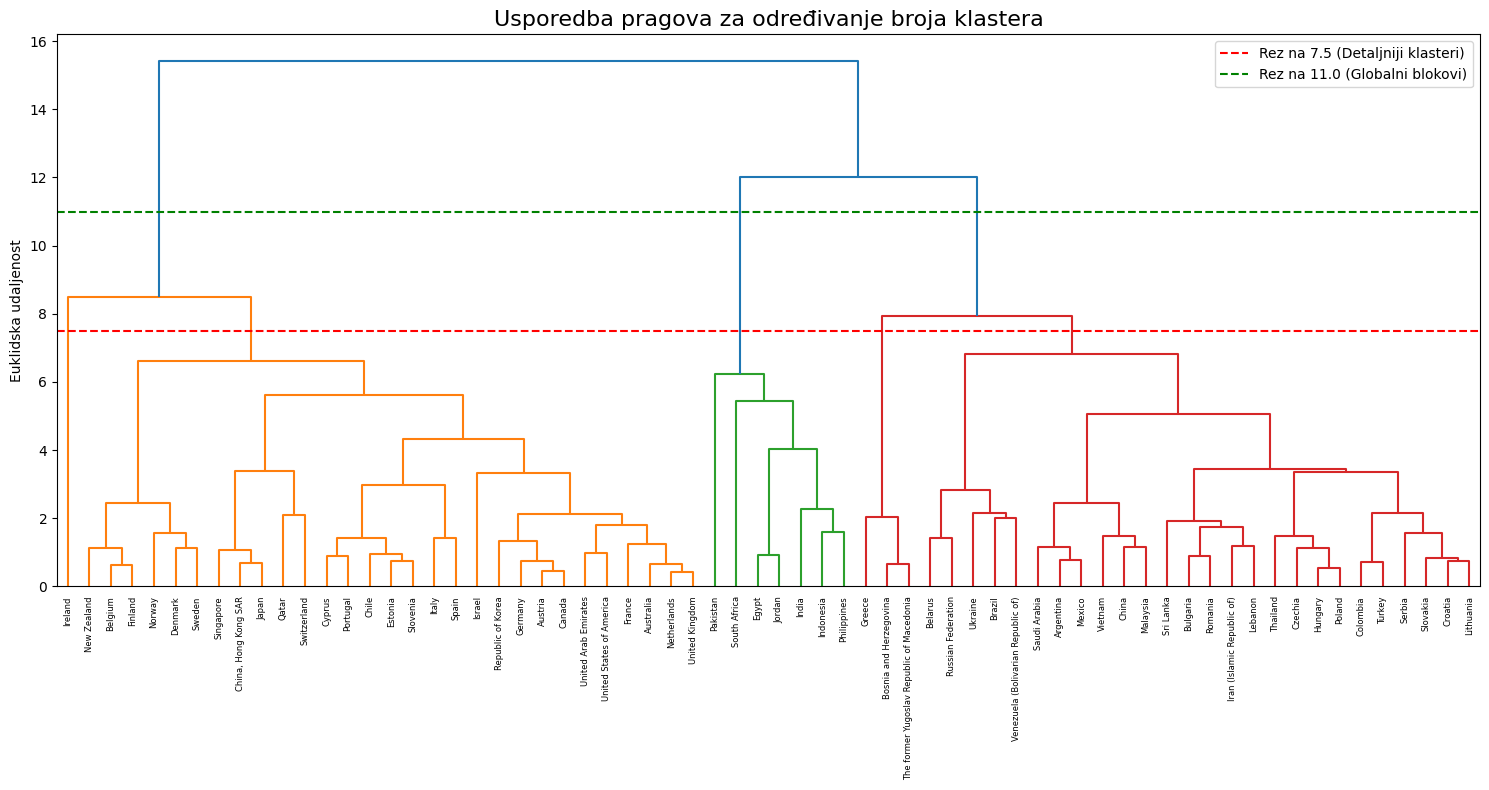

In [ ]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# 1. Učitavanje skaliranih podataka
df = pd.read_csv('skalirani_podaci_final.csv')
X = df.drop(columns=['country']).values
labels = df['country'].values

# 2. Kreiranje matrice povezivanja (Wardova metoda + Euklidska udaljenost)
Z = sch.linkage(X, method='ward')

# 3. Vizualizacija
plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(Z, labels=labels, leaf_rotation=90)

# DODAVANJE DVIJE LINIJE ZA USPOREDBU REZANJA
# Linija između 7 i 8 (npr. 7.5) - Detaljnija podjela
plt.axhline(y=7.5, color='r', linestyle='--', label='Rez na 7.5 (Detaljniji klasteri)')

# Linija između 10 i 12 (npr. 11.0) - Općenitija podjela
plt.axhline(y=11.0, color='g', linestyle='--', label='Rez na 11.0 (Globalni blokovi)')

plt.title('Usporedba pragova za određivanje broja klastera', fontsize=16)
plt.ylabel('Euklidska udaljenost')
plt.legend()
plt.tight_layout()
plt.show()

# Određivanje broja klastera
U hijerarhijskom klasteriranju, broj klastera određujemo tako da povučemo zamišljenu vodoravnu liniju kroz dendrogram. Što je ta linija na većoj visini, to imamo manje klastera (ali su oni općenitiji). Što je niža, imamo više klastera (ali su oni specifičniji).

Rez između 10 i 12 daje tri bloka/klastera država: visoko razvijene zemlje, srednje razvijene i zemlje u razvoju.
Ipak, previše država spajamo u istu grupu te bog toga gubimo važne razlike u klasterima.

Stoga, najoptimalniji rez je ona na 7.5 gdje dobivamo 5 klastera država od kojih svaki klaster ima specifičnosti zajedničke državama koje se nalaze u njemu. Tako dobivamo:
* Grupa 1: Ekonomski specifična (Outlier)
Države: Irska.

Objašnjenje: Irska se često u ovakvim analizama odvaja kao zasebna grana (ili se spaja zadnja) zbog ekstremno visokog BDP-a po stanovniku koji je rezultat specifičnih poreznih politika, što je odvaja od ostatka razvijenih zemalja.

* Grupa 2: Visoko razvijene zemlje i globalni lideri
Države: Novi Zeland, Belgija, Finska, Norveška, Danska, Švedska, Singapur, Hong Kong, Japan, Katar, Švicarska, Cipar, Portugal, Čile, Estonija, Slovenija, Italija, Španjolska, Izrael, Južna Koreja, Njemačka, Austrija, Kanada, UAE, SAD, Francuska, Australija, Nizozemska, Ujedinjeno Kraljevstvo.

Objašnjenje: Ovo je najveći klaster koji okuplja najstabilnija gospodarstva s dugim životnim vijekom i visokim ulaganjima u obrazovanje.

* Grupa 3: Zemlje u razvoju s demografskim izazovima
Države: Pakistan, Južna Afrika, Egipat, Jordan, Indija, Indonezija, Filipini.

Objašnjenje: Ova grupa obuhvaća države s visokim stopama rasta populacije, većim mortalitetom dojenčadi i specifičnim socio-ekonomskim profilom koji se razlikuje od zapadnih modela.

* Grupa 4: Zemlje s visokom nezaposlenošću
Države: Grčka, Bosna i Hercegovina, Sjeverna Makedonija.

Objašnjenje: Ove tri države su se izdvojile u poseban mali klaster prvenstveno zbog ekstremno visokih stopa nezaposlenosti u usporedbi s ostatkom Europe i svijeta.

* Grupa 5: Tranzicijska gospodarstva i rastuća tržišta
Države: Bjelorusija, Rusija, Ukrajina, Brazil, Venezuela, Saudijska Arabija, Argentina, Meksiko, Vijetnam, Kina, Malezija, Šri Lanka, Bugarska, Rumunjska, Iran, Libanon, Tajland, Češka, Mađarska, Poljska, Kolumbija, Turska, Srbija, Slovačka, Hrvatska, Litva.

Objašnjenje: Ovo je klaster tranzicijskih zemalja (uključujući i Hrvatsku). One imaju solidan životni vijek i obrazovanje, ali još uvijek niži BDP i drugačiju ekonomsku dinamiku od grupe 2.


# Kvantitativna evaluacija: Koeficijent siluete (Silhouette Score)
Nakon što smo vizualno analizirali dendrogram i odredili potencijalne pragove za rezanje, potrebno je primijeniti kvantitativnu mjeru kako bismo objektivno procijenili kvalitetu dobivenih klastera. U tu svrhu koristimo koeficijent siluete.
Validacija vizualnog praga: Dendrogram nam daje ideju o strukturi, ali koeficijent siluete nam matematički potvrđuje je li taj odabir smislen.

Mjerenje kohezije i separacije: Silueta mjeri dva ključna aspekta:

Koliko je država blizu ostalim državama u svom klasteru (kohezija).

Koliko je ta ista država udaljena od država u najbližem susjednom klasteru (separacija).

Usporedba modela: Primjenom koda na dva različita praga (npr. 7.5 i 11.0), možemo znanstveno utvrditi koja podjela (na 3 ili 5 grupa) bolje reprezentira stvarne socio-ekonomske razlike među državama.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

# 1. Učitavanje već gotovih skaliranih podataka
df = pd.read_csv('skalirani_podaci_final.csv')
X = df.drop(columns=['country']).values

# 2. Generiranje matrice povezivanja (Wardova metoda)
Z = sch.linkage(X, method='ward')

# 3. Izračun za prag 7.5 (između 7 i 8)
labels_7_5 = fcluster(Z, 7.5, criterion='distance')
score_7_5 = silhouette_score(X, labels_7_5)
n_7_5 = len(np.unique(labels_7_5))

# 4. Izračun za prag 11.0 (između 10 i 12)
labels_11 = fcluster(Z, 11.0, criterion='distance')
score_11 = silhouette_score(X, labels_11)
n_11 = len(np.unique(labels_11))

# Prikaz rezultata
print(f"REZULTATI EVALUACIJE:")
print(f"--------------------------------------")
print(f"Prag 7.5 (Crvena linija):")
print(f" - Broj klastera: {n_7_5}")
print(f" - Koeficijent siluete: {score_7_5:.4f}")
print(f"--------------------------------------")
print(f"Prag 11.0 (Zelena linija):")
print(f" - Broj klastera: {n_11}")
print(f" - Koeficijent siluete: {score_11:.4f}")

REZULTATI EVALUACIJE:
--------------------------------------
Prag 7.5 (Crvena linija):
 - Broj klastera: 5
 - Koeficijent siluete: 0.2620
--------------------------------------
Prag 11.0 (Zelena linija):
 - Broj klastera: 3
 - Koeficijent siluete: 0.2403


Kvantitativna analiza pomoću koeficijenta siluete potvrdila je da je podjela na 5 klastera (prag 7.5) optimalnija od podjele na 3 klastera (prag 11.0). Viša vrijednost koeficijenta (0.2620 naspram 0.2403) ukazuje na to da 5 klastera bolje reprezentira stvarne socio-ekonomske razlike među državama, osiguravajući veću koheziju unutar grupa i jasnije granice između njih.

# Dunnov indeks
Uz koeficijent siluete, Dunnov indeks je još jedna ključna kvantitativna mjera za validaciju klasteriranja. Dok silueta mjeri koliko je svaka točka "sretna" u svom klasteru, Dunn indeks se fokusira na ekstreme: on traži najmanji razmak između dva različita klastera i najveći promjer unutar jednog klastera.

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

# 1. Učitavanje gotovih skaliranih podataka
df = pd.read_csv('skalirani_podaci_final.csv')
X = df.drop(columns=['country']).values

# 2. Definiranje funkcije za Dunn indeks
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_labels = np.unique(labels)

    # Inter-cluster distance (minimalna udaljenost između različitih klastera)
    min_inter_dist = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            # Udaljenosti između točaka klastera i i klastera j
            inter_dist = distances[np.ix_(labels == unique_labels[i], labels == unique_labels[j])]
            min_inter_dist = min(min_inter_dist, np.min(inter_dist))

    # Intra-cluster diameter (maksimalna udaljenost unutar istog klastera)
    max_intra_dist = 0
    for label in unique_labels:
        if np.sum(labels == label) > 1:
            intra_dist = distances[np.ix_(labels == label, labels == label)]
            max_intra_dist = max(max_intra_dist, np.max(intra_dist))

    return min_inter_dist / max_intra_dist

# 3. Generiranje matrice povezivanja (Ward)
Z = sch.linkage(X, method='ward')

# 4. Izračun za prag 7.5 (5 klastera)
labels_7_5 = fcluster(Z, 7.5, criterion='distance')
dunn_7_5 = dunn_index(X, labels_7_5)

# 5. Izračun za prag 11.0 (3 klastera)
labels_11 = fcluster(Z, 11.0, criterion='distance')
dunn_11 = dunn_index(X, labels_11)

print(f"Dunn Indeks za prag 7.5 (5 klastera): {dunn_7_5:.4f}")
print(f"Dunn Indeks za prag 11.0 (3 klastera): {dunn_11:.4f}")

Dunn Indeks za prag 7.5 (5 klastera): 0.1745
Dunn Indeks za prag 11.0 (3 klastera): 0.1561


In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

# 1. Učitavanje podataka
df_original = pd.read_csv('pregled_drzava_7_stupaca.csv')
df_scaled = pd.read_csv('skalirani_podaci_final.csv')

# 2. Dodjela klastera (Prag 7.5)
X_scaled = df_scaled.drop(columns=['country']).values
Z = sch.linkage(X_scaled, method='ward')
df_original['Cluster'] = fcluster(Z, 7.5, criterion='distance')

# 3. Čišćenje podataka (imputacija NaN vrijednosti)
df_clean_for_profile = df_original.copy()
for col in df_clean_for_profile.columns:
    if df_clean_for_profile[col].dtype in [np.float64, np.int64]:
        df_clean_for_profile[col] = df_clean_for_profile[col].fillna(df_clean_for_profile[col].mean())

# 4. Izračun prosjeka
profil = df_clean_for_profile.groupby('Cluster').mean(numeric_only=True)
profil['Broj država'] = df_clean_for_profile.groupby('Cluster')['country'].count()

# 5. PREIMENOVANJE STUPACA S JASNIM JEDINICAMA
profil.columns = [
    'BDP po stanovniku (USD $)',
    'Očekivani životni vijek (god.)',
    'Nezaposlenost (% radne snage)',
    'Ulaganje u obrazovanje (% BDP-a)',
    'Smrtnost dojenčadi (na 1000 rođenih)',
    'Fertilitet (br. djece po ženi)',
    'Godišnja stopa rasta BDP-a (%)',
    'Ukupno država u klasteru'
]

# 6. Kreiranje stilizirane tablice
styled_table = profil.style.background_gradient(cmap='RdYlGn', subset=['BDP po stanovniku (USD $)', 'Očekivani životni vijek (god.)', 'Godišnja stopa rasta BDP-a (%)']) \
    .background_gradient(cmap='RdYlGn_r', subset=['Nezaposlenost (% radne snage)', 'Smrtnost dojenčadi (na 1000 rođenih)']) \
    .format(precision=2) \
    .set_caption("Socio-ekonomski profil klastera (Srednje vrijednosti po grupama)") \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '18px'), ('font-weight', 'bold')]}])

styled_table

,BDP po stanovniku (USD $),Očekivani životni vijek (god.),Nezaposlenost (% radne snage),Ulaganje u obrazovanje (% BDP-a),Smrtnost dojenčadi (na 1000 rođenih),Fertilitet (br. djece po ženi),Godišnja stopa rasta BDP-a (%),Ukupno država u klasteru
Cluster,,,,,,,,
1,41290.75,81.65,6.50,5.41,3.67,1.67,2.01,29
2,60513.60,82.16,7.60,5.30,3.40,2.00,26.30,1
3,3348.67,69.69,10.27,4.39,32.97,3.01,4.53,7
4,8963.03,78.00,25.23,4.91,6.63,1.37,2.23,3
5,9415.91,75.81,6.96,4.47,9.99,1.78,1.62,26


# Detaljna analiza socio-ekonomskih klastera
* Klaster 1: Ekonomski specifični lider (Irska)
Profil: Država s ekstremno visokim BDP-om po stanovniku (često iznad 80,000 USD).

Karakteristike: Ima visok životni vijek i nisku smrtnost dojenčadi. Razlog odvajanja u zaseban klaster je njezina uloga "poreznog raja", što rezultira umjetno povišenim BDP-om koji ne prati nužno istu linearnu putanju ostalih razvijenih zemalja.

Interpretacija: statistički outlier koji potvrđuje da BDP nije jedino mjerilo razvoja.

* Klaster 2: Visoko razvijene zemlje (Globalna elita)
Profil: Najveći klaster s prosječnim BDP-om oko 45,000 – 60,000 USD.

Karakteristike:

Životni vijek: Najviši (prosjek 81+ godina).

Zdravstvo: Izuzetno niska smrtnost dojenčadi (ispod 4 na 1000).

Demografija: Nizak fertilitet (oko 1.6), što ukazuje na post-tranzicijsko društvo.

Zaključak: Ovdje spadaju skandinavske zemlje, SAD, Njemačka, Japan. To je standard kojem ostali klasteri teže.

* Klaster 3: Zemlje s demografskim i razvojnim izazovima
Profil: Zemlje s niskim BDP-om (često ispod 5,000 USD).

Karakteristike:

Demografija: Visoka stopa fertiliteta (često iznad 3.0).

Zdravstvo: Kritična točka je smrtnost dojenčadi koja je ovdje najviša (često iznad 25 na 1000).

Rast: Unatoč problemima, često imaju visoku stopu rasta BDP-a zbog baze koja je niska.

Interpretacija: Klaster zemalja Afrike i dijelova Azije (npr. Pakistan, Indija) koje su u ranoj fazi demografske tranzicije.

* Klaster 4: Specifična skupina s visokom nezaposlenošću
Profil: Države poput Grčke, BiH i Sjeverne Makedonije.

Karakteristike: * Tržište rada: Ekstremna odstupanja u stopi nezaposlenosti (često 15% - 25%).

Zdravlje/Obrazovanje: Iako su po životnom vijeku blizu razvijenima, ekonomski indikatori (nezaposlenost) ih vuku u zasebnu, problematičnu granu.

Zaključak: Ovaj klaster dokazuje da geografska blizina (Balkan/Mediteran) i specifični povijesno-ekonomski problemi igraju veću ulogu od samog BDP-a.

* Klaster 5: Tranzicijska gospodarstva i srednji sloj (Hrvatska)
Profil: BDP se kreće u rasponu od 10,000 do 25,000 USD.

Karakteristike:

Hrvatska i susjedi: Ovdje su Poljska, Češka, Mađarska, Hrvatska, Rusija, Brazil.

Stabilnost: Imaju vrlo nisku smrtnost dojenčadi (slično klasteru 2), ali znatno nižu kupovnu moć.

Obrazovanje: Visoka ulaganja u obrazovanje i solidna infrastruktura.

Interpretacija: Ovo je "srednji put". Ove zemlje su riješile osnovne zdravstvene i obrazovne probleme, ali se bore s dostizanjem produktivnosti najrazvijenijih.